In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import hddm

C:\Users\Tejas\anaconda3\lib\site-packages\IPython\parallel.py:12: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  warn("The `IPython.parallel` package has been deprecated since IPython 4.0. "


In [8]:
data = hddm.load_csv('RTs.csv')
errors = hddm.load_csv('Curvature_Errors.csv')

In [23]:
data.groupby(['Participant_Id', 'Block', 'Condition']).mean().reset_index()

,Participant_Id,Block,Condition,Unnamed: 0,Trial,ITs,MTs,response
0,0,0,Sudden_Speed,31.5,31.5,0.805918,0.914584,1.000000
1,0,1,Sudden_Speed,95.5,95.5,1.076786,2.466647,0.000000
2,0,2,Sudden_Speed,159.5,159.5,0.789097,1.864332,0.000000
3,0,3,Sudden_Speed,223.5,223.5,0.614537,1.508165,0.000000
4,0,4,Sudden_Speed,287.5,287.5,0.596462,1.335534,0.000000
...,...,...,...,...,...,...,...,...
715,59,7,Gradual_Accuracy,45791.5,479.5,1.061509,2.432015,0.281250
716,59,8,Gradual_Accuracy,45855.5,543.5,1.101793,2.889663,0.343750
717,59,9,Gradual_Accuracy,45919.5,607.5,0.910312,2.279949,0.921875
718,59,10,Gradual_Accuracy,45983.5,671.5,0.978029,2.621124,0.750000


In [12]:
data['Condition'] = data['Rotation'] + '_' + data['Emphasis']

In [9]:
data['response'] = (errors['Errors'] < 20/90).astype(int)

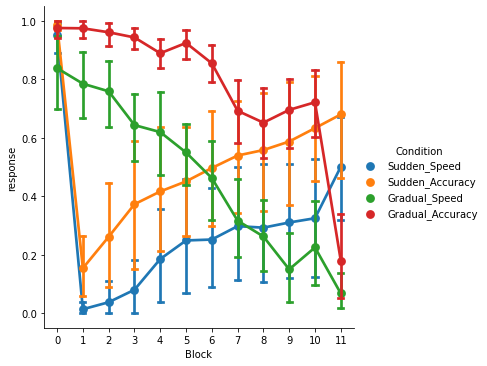

In [30]:
sns.catplot(x = 'Block', y = 'response', hue = 'Condition',
           data = data.groupby(['Participant_Id', 'Block', 'Condition']).mean().reset_index(), kind = 'point', capsize = 0.2)

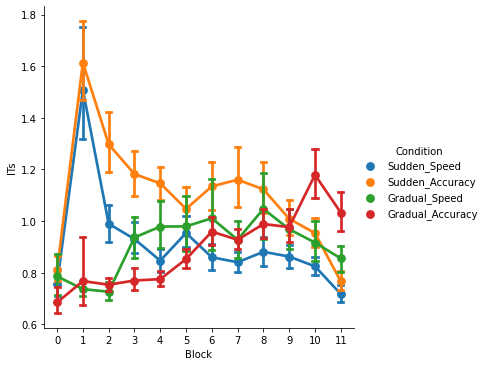

In [14]:
sns.catplot(x = 'Block', y = 'ITs', hue = 'Condition',
           data = data, kind = 'point', capsize = 0.2)

In [4]:
data = data.rename(columns={'Participant_Id':'subj_idx', 'ITs':'rt'})

In [41]:
m = hddm.HDDM(data, 
              depends_on = {'v': ['Block', 'Rotation', 'Emphasis'],
                            'a': ['Block', 'Rotation', 'Emphasis']},
              p_outlier = 0.05,
              informative = False
             )

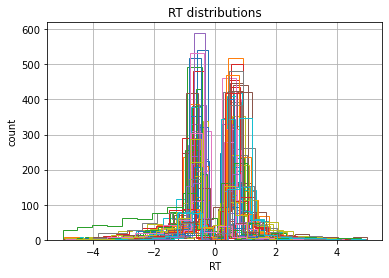

In [38]:
data1 = hddm.utils.flip_errors(data[data['rt'] < 5])

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data1.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)


In [42]:
m.find_starting_values()

/home/vm01/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


In [42]:
# Look at Kabuki docs to create ridgeline plots

In [43]:
m.sample(5000, burn = 1000, dbname='traces_1.db', db = 'pickle')

 [-----------------100%-----------------] 5001 of 5000 complete in 18328.7 sec

In [2]:
m = hddm.load('hddm_1')


In [41]:
hddm.analyze.plot_posterior_nodes(vblock)

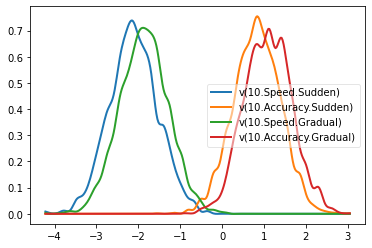

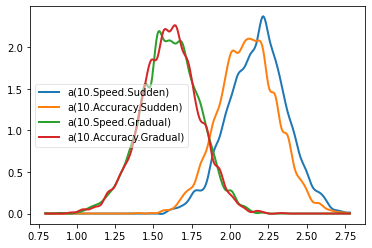

In [44]:
block = 10
vblock = m.nodes_db.node[['v('+str(block)+'.Speed.Sudden)', 'v('+str(block)+'.Accuracy.Sudden)', 'v('+str(block)+'.Speed.Gradual)', 'v('+str(block)+'.Accuracy.Gradual)']]
ablock = m.nodes_db.node[['a('+str(block)+'.Speed.Sudden)', 'a('+str(block)+'.Accuracy.Sudden)', 'a('+str(block)+'.Speed.Gradual)', 'a('+str(block)+'.Accuracy.Gradual)']]
hddm.analyze.plot_posterior_nodes(vblock),
hddm.analyze.plot_posterior_nodes(ablock)


In [46]:
print("P_a(10.Accuracy.Sudden > 10.Accuracy.Gradual) = ", (ablock[1].trace() > ablock[3].trace()).mean())

P_a(10.Accuracy.Sudden > 10.Accuracy.Gradual) =  0.973


C:\Users\Tejas\anaconda3\lib\site-packages\kabuki\analyze.py:545: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


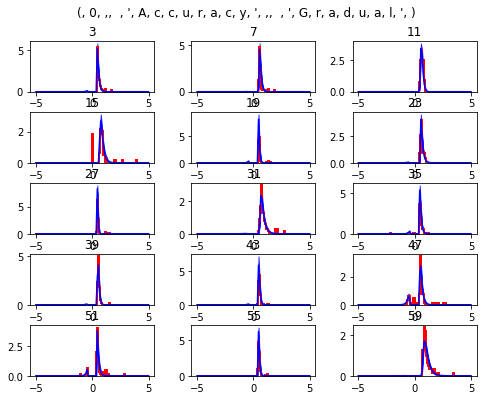

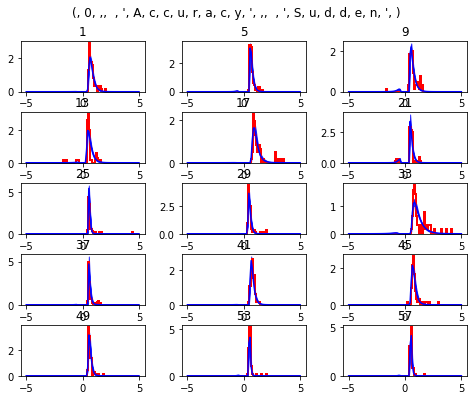

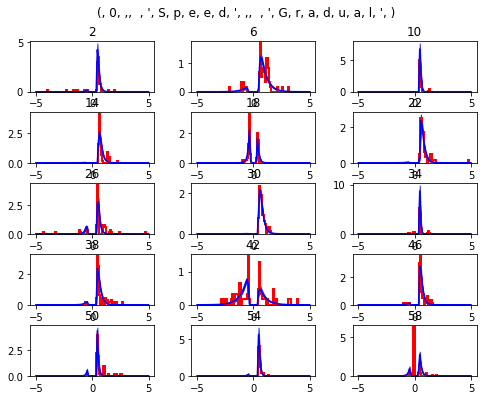

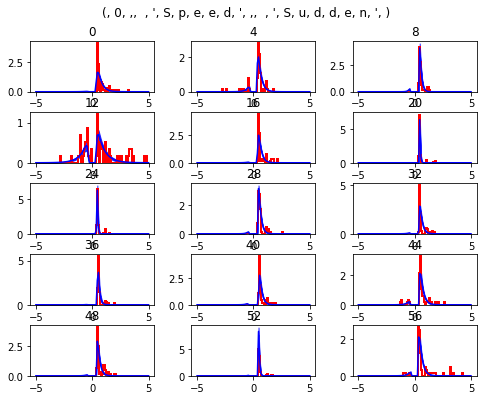

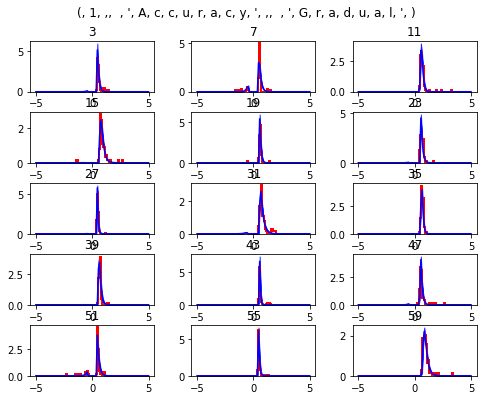

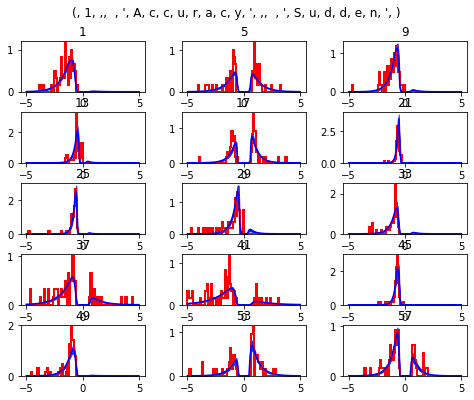

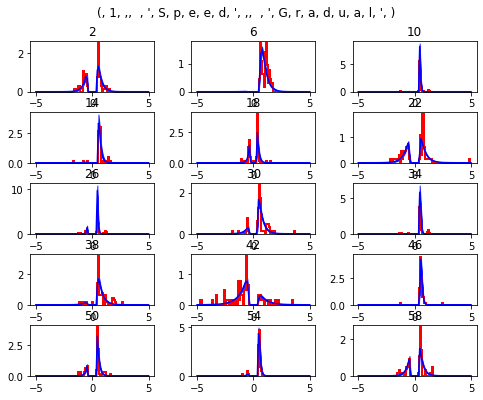

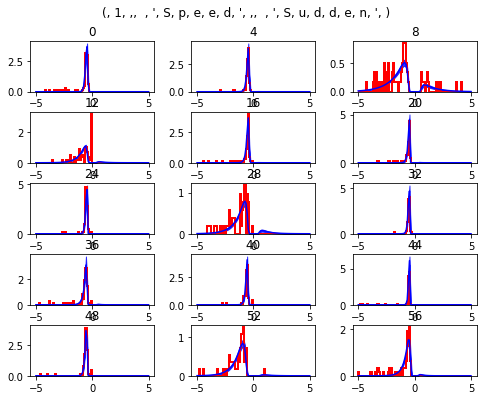

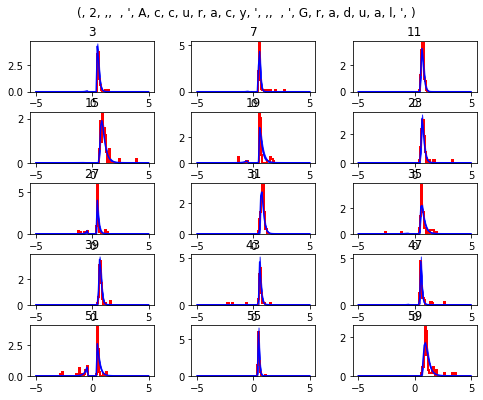

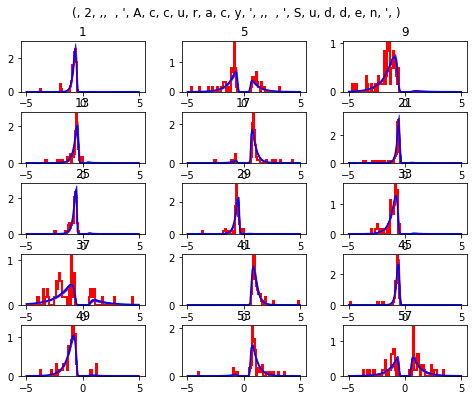

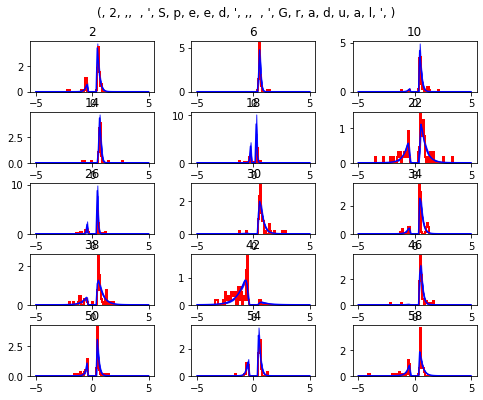

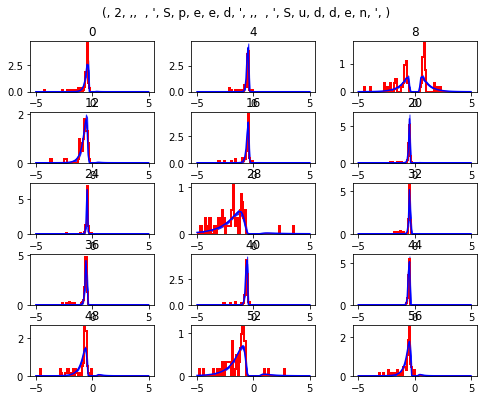

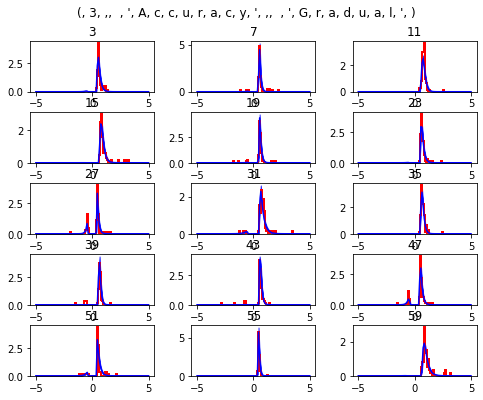

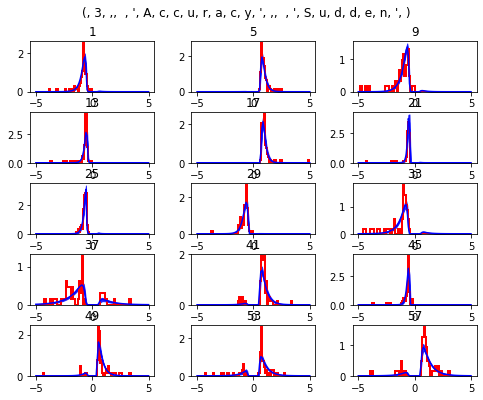

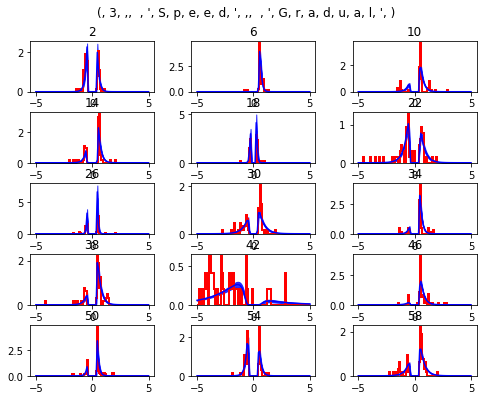

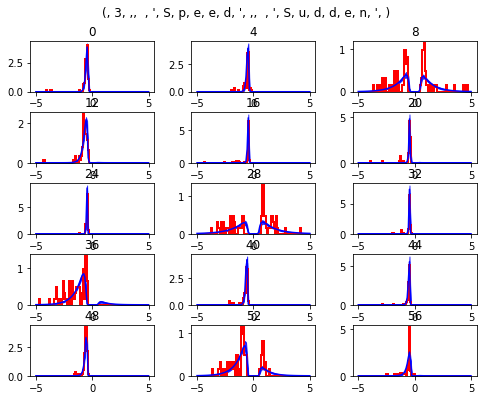

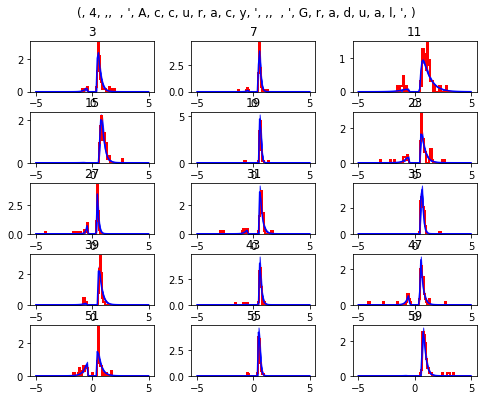

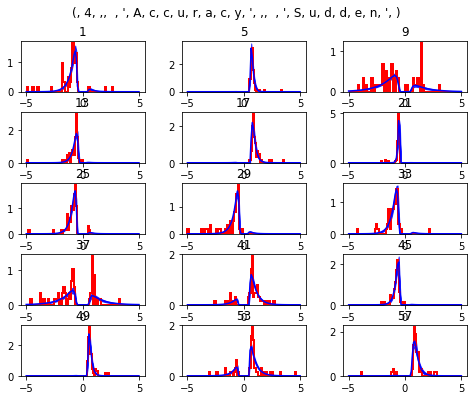

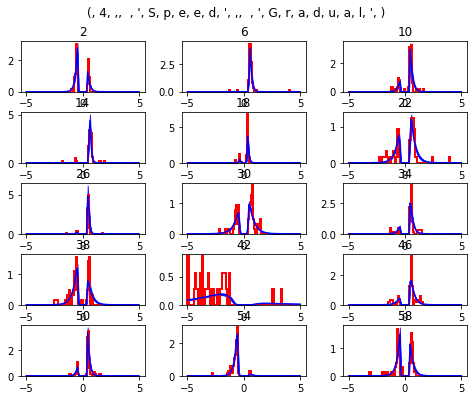

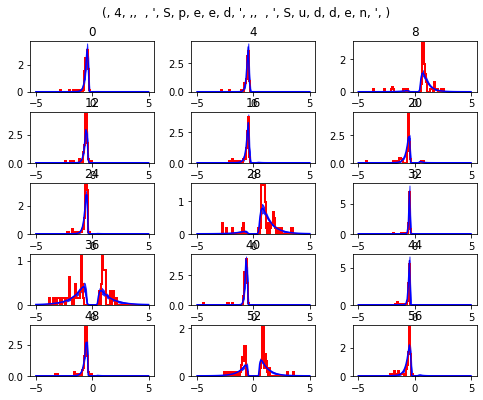

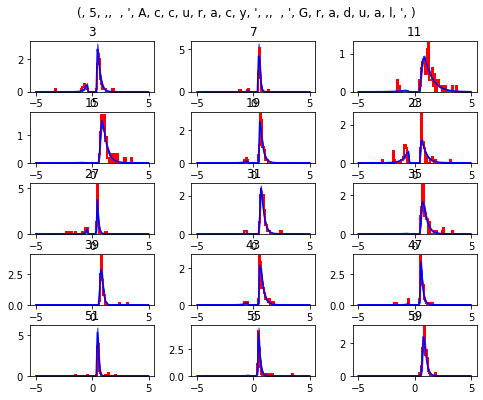

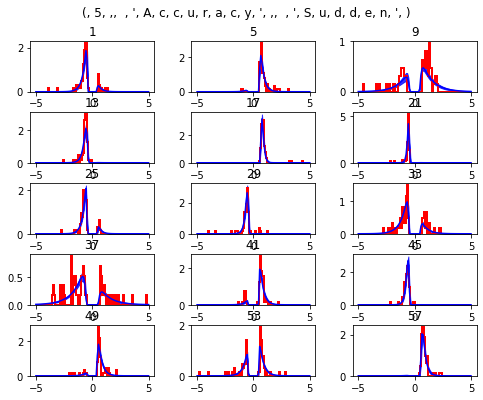

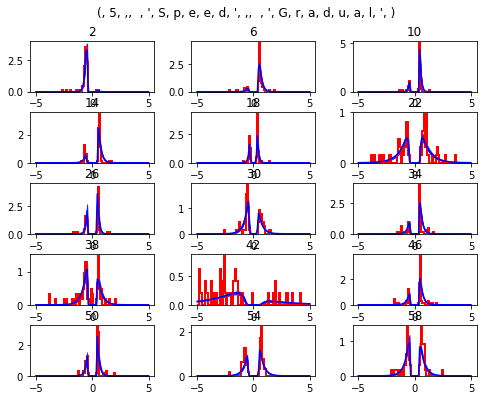

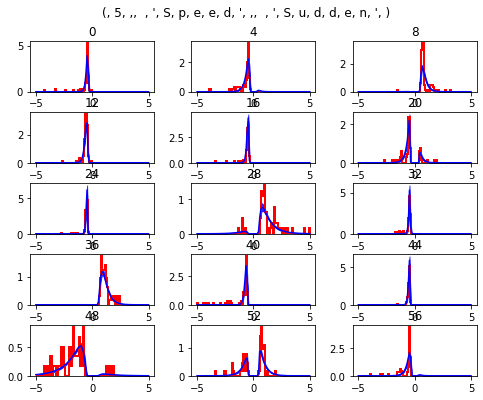

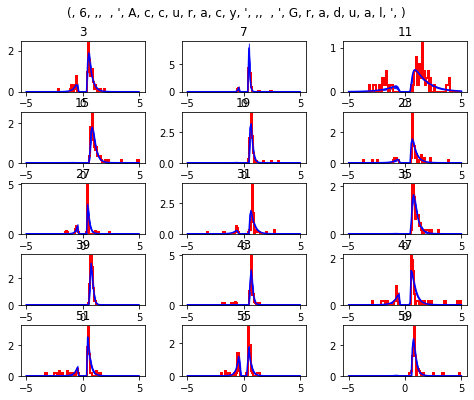

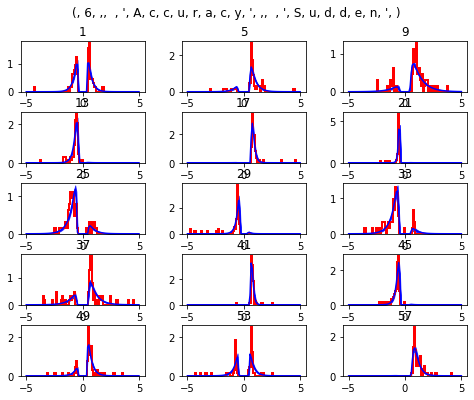

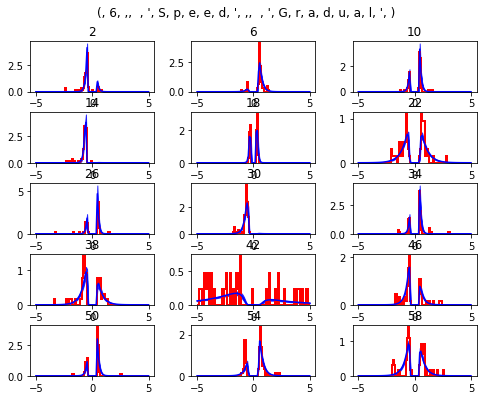

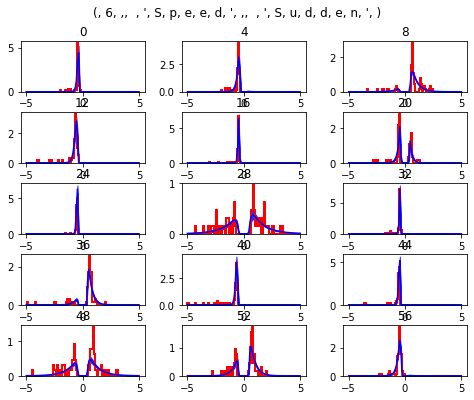

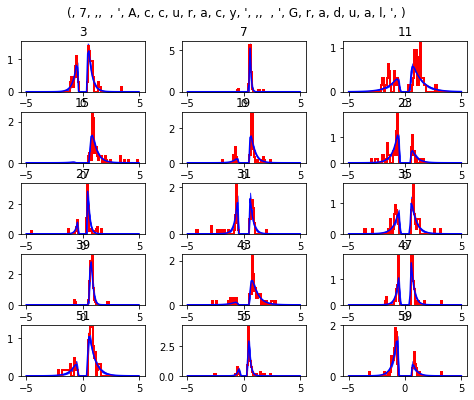

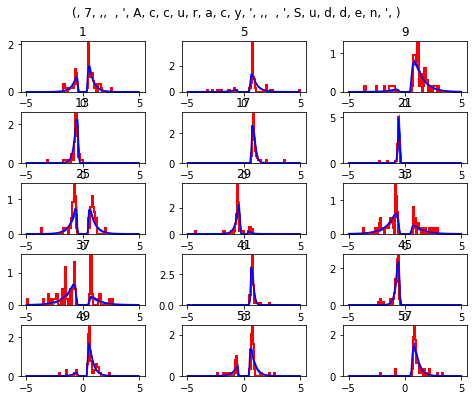

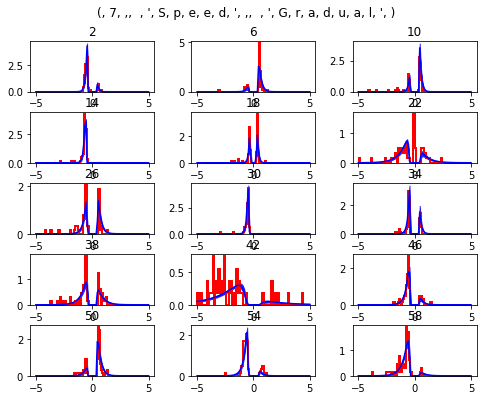

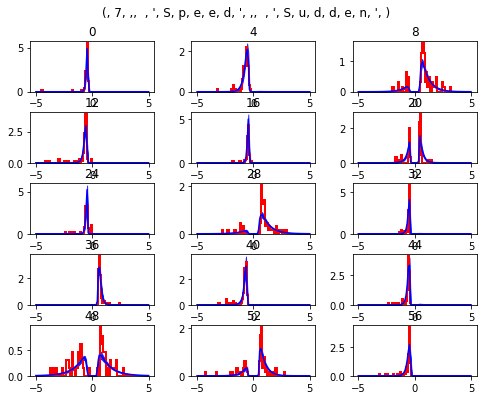

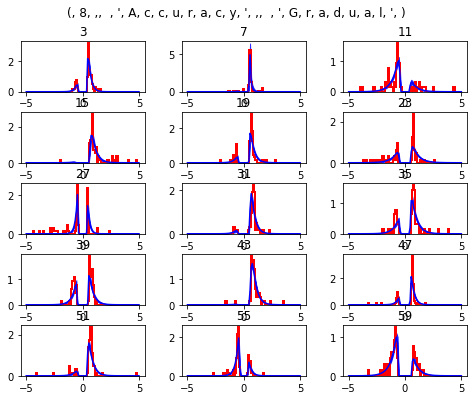

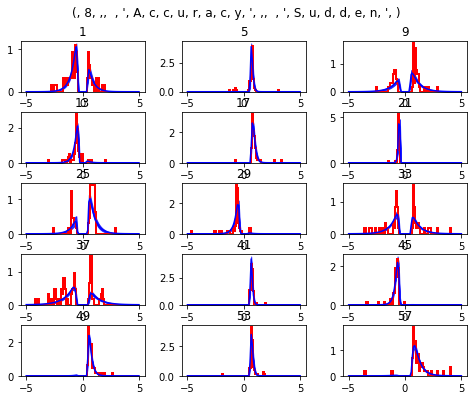

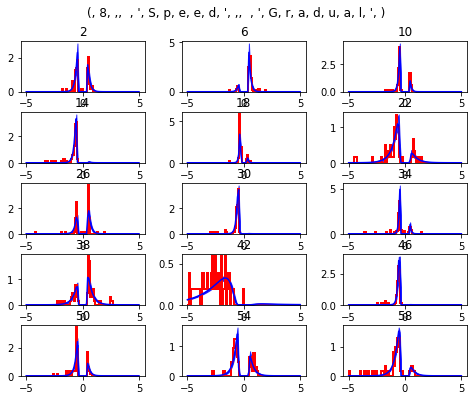

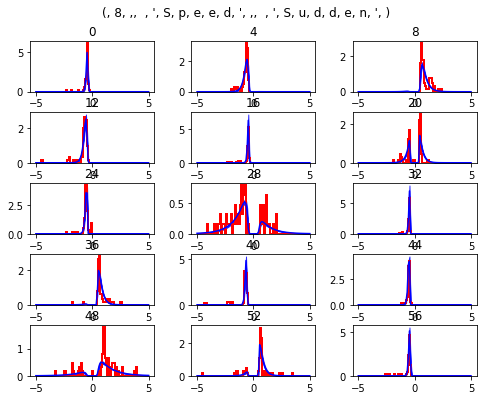

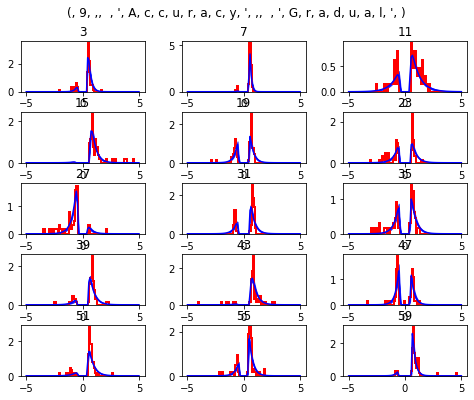

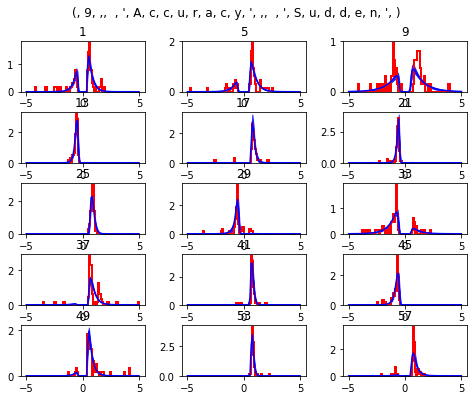

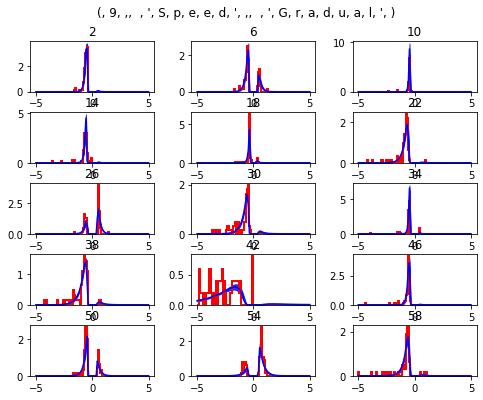

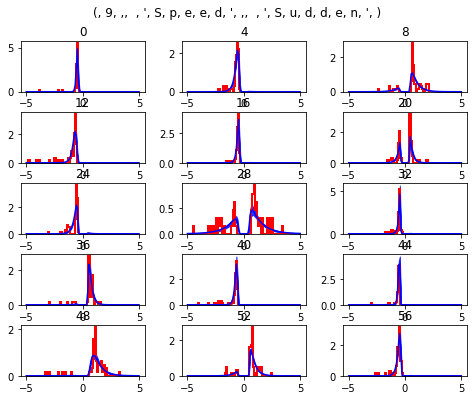

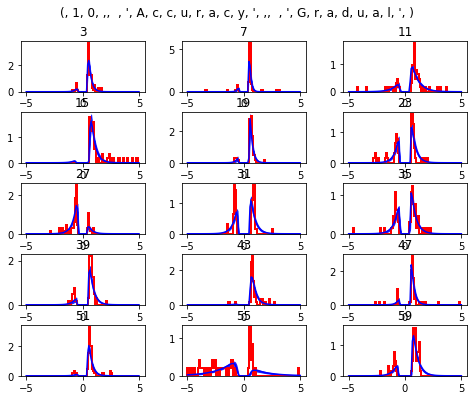

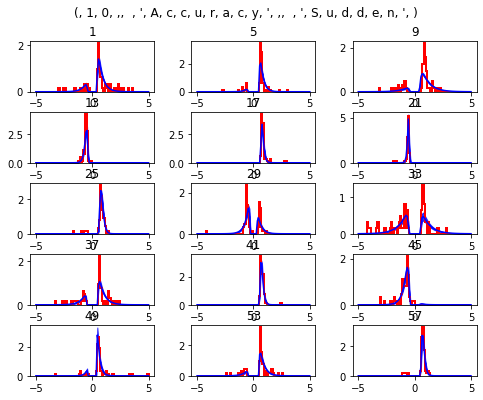

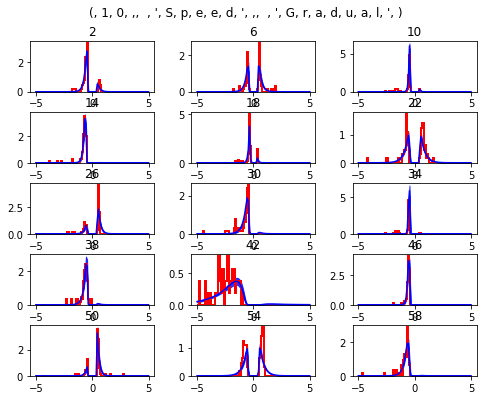

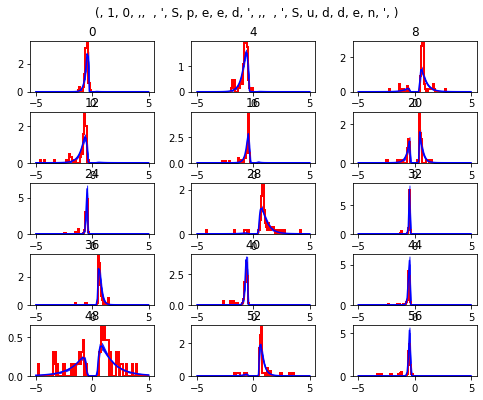

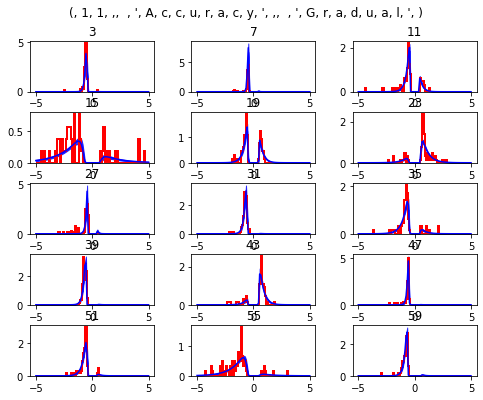

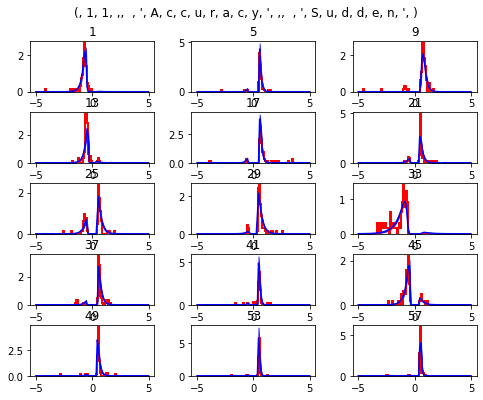

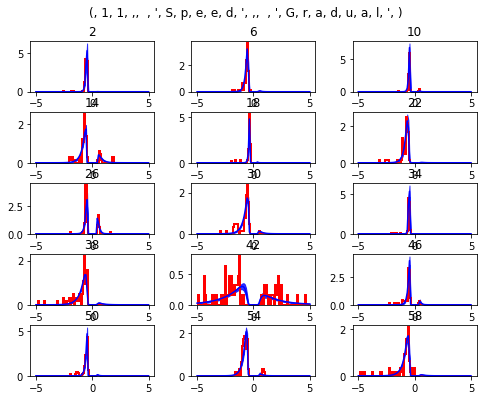

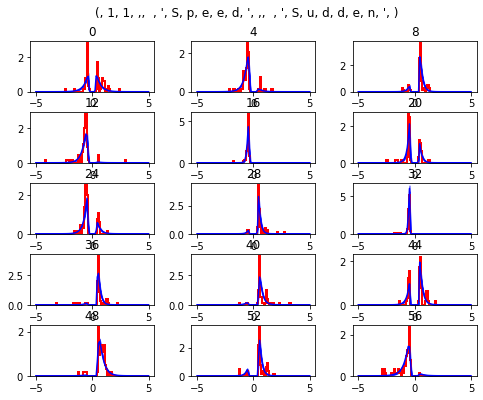

In [3]:
m.plot_posterior_predictive()